# Neural Spiking Data in the Awake Rat Somatosensory Cortex Responding to Trials of Transcranial Focused Ultrasound Stimulation

**IMPORTANT NOTICE:** This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results presented here. The purpose of this notebook is to help you get started analyzing the data; the results should not be considered definitive without further validation and analysis.

## Introduction

This notebook will guide you through exploring and analyzing neural spiking data from Dandiset 000945, which contains recordings of neural activity in the rat somatosensory cortex during transcranial focused ultrasound stimulation (tFUS). The data was collected to investigate how different ultrasound stimulation parameters affect neural activity.

In these experiments, different pulse repetition frequencies (PRFs) of ultrasound stimulation were tested using a 128-element random array ultrasound transducer. Chronic electrophysiological recordings were acquired using 32-channel NeuroNexus electrodes (Model: A1x32-Poly3-10mm-50-177-Z32) implanted in the rat brain.

Key details:
- Ultrasound stimulation was delivered every ~2.5 seconds (with 10% jitter)
- Each recording contains 500 trials
- Five different PRFs were tested: 30 Hz, 300 Hz, 1500 Hz, 3000 Hz, and 4500 Hz
- Each stimulation had a 200 microsecond pulse duration and 67 ms total ultrasound duration
- Some recordings were performed under anesthesia (2% isoflurane) for comparison
- The dataset includes 10 male rat subjects, with recordings taken at 8-10 months of age and some repeat recordings at 12 months

## Required Packages

Make sure you have the following packages installed before proceeding. If not, you can install them with pip.

```bash
pip install dandi pynwb lindi matplotlib numpy seaborn
```

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dandi.dandiapi import DandiAPIClient
import pynwb
import lindi

# Set up matplotlib and seaborn for plotting
sns.set_theme()

## 1. Exploring the Dandiset Structure

Let's start by getting information about the Dandiset and exploring its structure. We'll use the DANDI API to list all the assets (files) in the Dandiset.

In [2]:
# Connect to the DANDI API and get the Dandiset
client = DandiAPIClient()
dandiset = client.get_dandiset("000945")
assets = list(dandiset.get_assets())

# Print basic information about the Dandiset
metadata = dandiset.get_metadata()
print(f"Dandiset Name: {metadata.name}")
print(f"Total assets: {len(assets)}")

Dandiset Name: Neural Spiking Data in the Awake Rat Somatosensory Cortex Responding to Trials of Transcranial Focused Ultrasound Stimulation
Total assets: 75


### Organizing Assets by Subject

Let's organize the assets by subject to get a better understanding of the dataset structure.

In [3]:
# Organize assets by subject
subjects = {}
for asset in assets:
    path = asset.path
    subject_id = path.split('/')[0]
    if subject_id not in subjects:
        subjects[subject_id] = []
    subjects[subject_id].append(path)

# Print subject summary
print("Subject summary:")
for subject_id, paths in subjects.items():
    print(f"{subject_id}: {len(paths)} files")

Subject summary:
sub-BH498: 13 files
sub-BH506: 9 files
sub-BH508: 10 files
sub-BH512: 12 files
sub-BH519: 5 files
sub-BH521: 5 files
sub-BH526: 7 files
sub-BH527: 5 files
sub-BH497: 5 files
sub-BH514: 4 files


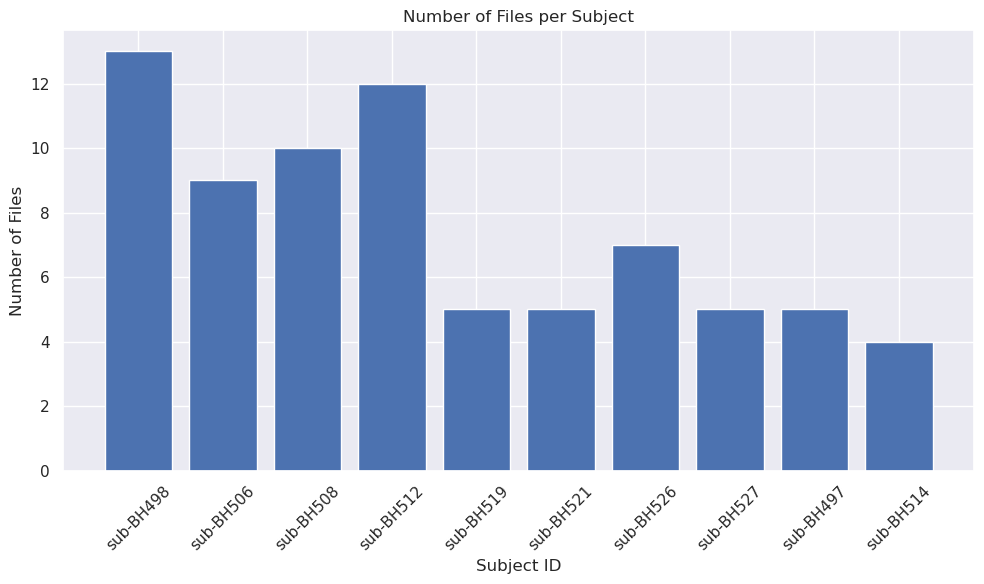

In [4]:
# Visualize the number of files per subject
plt.figure(figsize=(10, 6))
subject_ids = list(subjects.keys())
file_counts = [len(subjects[subject_id]) for subject_id in subject_ids]
plt.bar(subject_ids, file_counts)
plt.xlabel('Subject ID')
plt.ylabel('Number of Files')
plt.title('Number of Files per Subject')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see that the dataset contains recordings from 10 subjects, with varying numbers of files per subject. Some subjects have more files, which might indicate multiple recording sessions or different stimulation parameters.

## 2. Examining an NWB File

Now let's examine the structure of a sample NWB file from this dataset. We'll choose a file from the subject with a good number of recordings.

In [5]:
# Pick a sample file from a subject with multiple files (BH498)
sample_files = [asset for asset in assets if "BH498" in asset.path]
if sample_files:
    sample_asset = sample_files[2]  # Choose the third file for this subject
else:
    sample_asset = assets[0]  # Fallback to the first asset

sample_path = sample_asset.path
sample_id = sample_asset.identifier
print(f"Examining sample file: {sample_path}")

Examining sample file: sub-BH498/sub-BH498_ses-20240305T191833_ecephys.nwb


In [6]:
# Create the Lindi file URL for accessing the NWB file
lindi_url = f"https://lindi.neurosift.org/dandi/dandisets/000945/assets/{sample_id}/nwb.lindi.json"

# Open the NWB file
print("Opening NWB file...")
f = lindi.LindiH5pyFile.from_lindi_file(lindi_url)
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

# Print basic file information
print(f"Session description: {nwb.session_description}")
print(f"NWB identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject species: {nwb.subject.species}")
print(f"Subject sex: {nwb.subject.sex}")
print(f"Subject age: {nwb.subject.age}")

Opening NWB file...


Session description: Awake S1 Stimulation by tFUS
NWB identifier: BH498_4500_200_2
Session start time: 2024-03-05 19:18:33-05:00
Subject ID: BH498
Subject species: Rattus norvegicus
Subject sex: M
Subject age: P24W


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### Exploring the Electrode Data

Let's examine the electrode array information in the file.

Number of electrodes: 32
Electrode columns: ('x', 'y', 'z', 'imp', 'location', 'filtering', 'group', 'group_name')


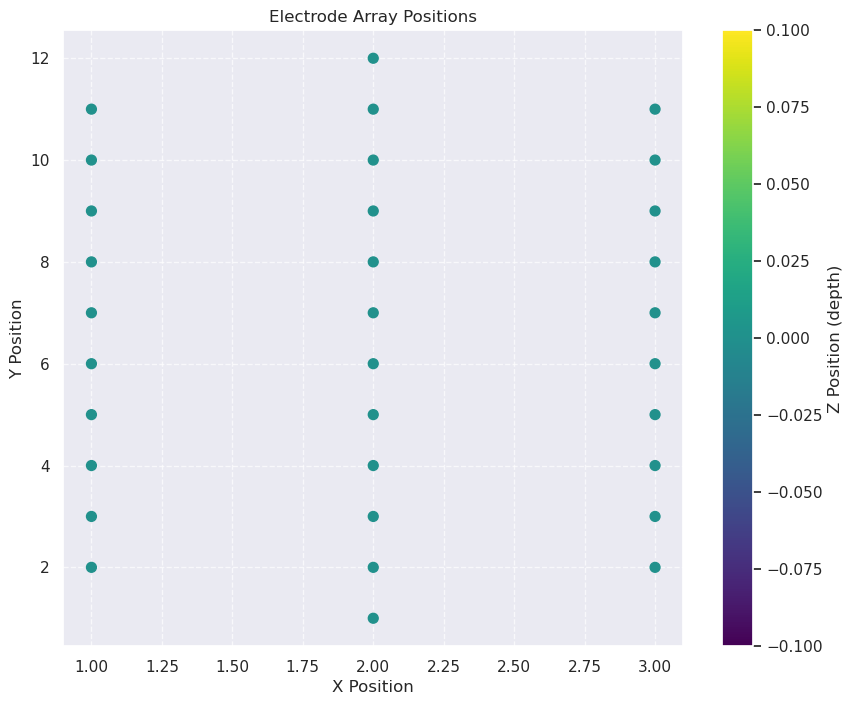

In [7]:
# Examine electrode information
electrodes = nwb.electrodes
print(f"Number of electrodes: {len(electrodes)}")
print(f"Electrode columns: {electrodes.colnames}")

# Get some basic information about electrode positions
x_pos = electrodes["x"].data[:]
y_pos = electrodes["y"].data[:]
z_pos = electrodes["z"].data[:]

# Plot electrode positions
plt.figure(figsize=(10, 8))
plt.scatter(x_pos, y_pos, s=50, c=z_pos, cmap='viridis')
plt.colorbar(label='Z Position (depth)')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Electrode Array Positions')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Exploring Trial Information

Now let's look at the trial information. Each trial corresponds to an ultrasound stimulation event.

Number of trials: 500
Mean trial duration: 2.200 seconds
Standard deviation of trial durations: 0.000 seconds


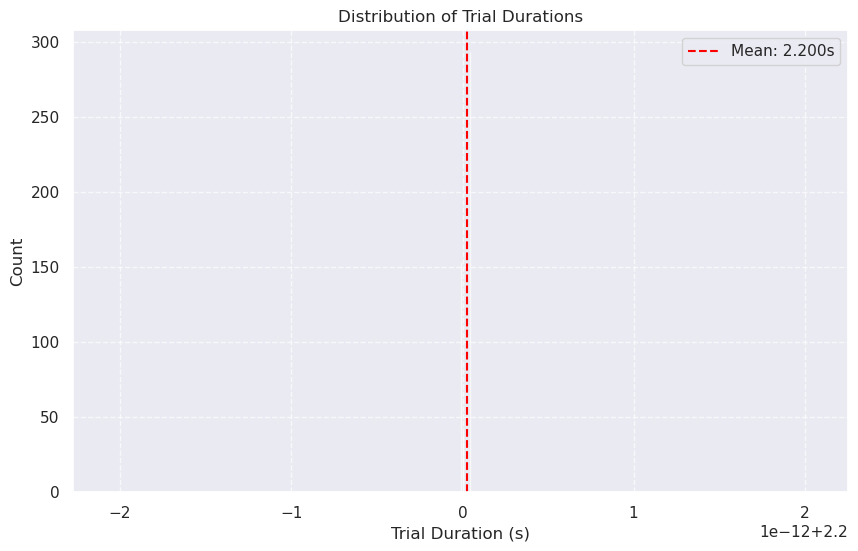

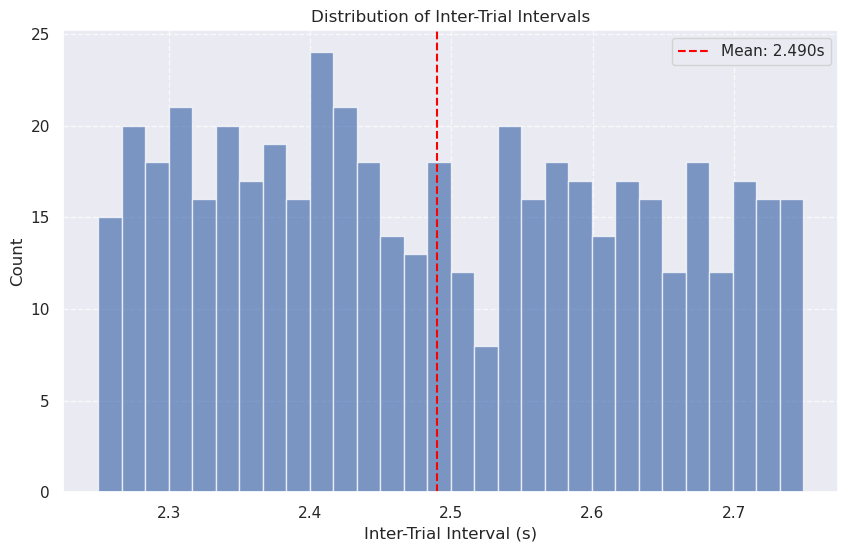

In [8]:
# Get trial information
trials = nwb.intervals["trials"]
print(f"Number of trials: {len(trials)}")

# Get trial start and stop times
trial_start_times = trials["start_time"][:]
trial_stop_times = trials["stop_time"][:]

# Calculate trial durations
trial_durations = trial_stop_times - trial_start_times
mean_duration = np.mean(trial_durations)
std_duration = np.std(trial_durations)

print(f"Mean trial duration: {mean_duration:.3f} seconds")
print(f"Standard deviation of trial durations: {std_duration:.3f} seconds")

# Plot histogram of trial durations
plt.figure(figsize=(10, 6))
plt.hist(trial_durations, bins=30, alpha=0.7)
plt.axvline(mean_duration, color='red', linestyle='--', label=f'Mean: {mean_duration:.3f}s')
plt.xlabel('Trial Duration (s)')
plt.ylabel('Count')
plt.title('Distribution of Trial Durations')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Plot inter-trial intervals
inter_trial_intervals = trial_start_times[1:] - trial_start_times[:-1]
plt.figure(figsize=(10, 6))
plt.hist(inter_trial_intervals, bins=30, alpha=0.7)
mean_iti = np.mean(inter_trial_intervals)
plt.axvline(mean_iti, color='red', linestyle='--', label=f'Mean: {mean_iti:.3f}s')
plt.xlabel('Inter-Trial Interval (s)')
plt.ylabel('Count')
plt.title('Distribution of Inter-Trial Intervals')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

The trials have a consistent duration of around 2.2 seconds, with inter-trial intervals averaging about 2.5 seconds. This aligns with the description that stimulation was delivered approximately every 2.5 seconds with 10% jitter.

## 3. Examining Neural Spiking Data

Now, let's examine the neural spiking data in the file. We'll look at the distribution of cell types and their spiking activity.

Number of units: 64
Unit columns: ('spike_times', 'celltype_label')
Unique cell types: [1. 2.]
RSU (Regular-Spiking Unit): 32 units
FSU (Fast-Spiking Unit): 32 units


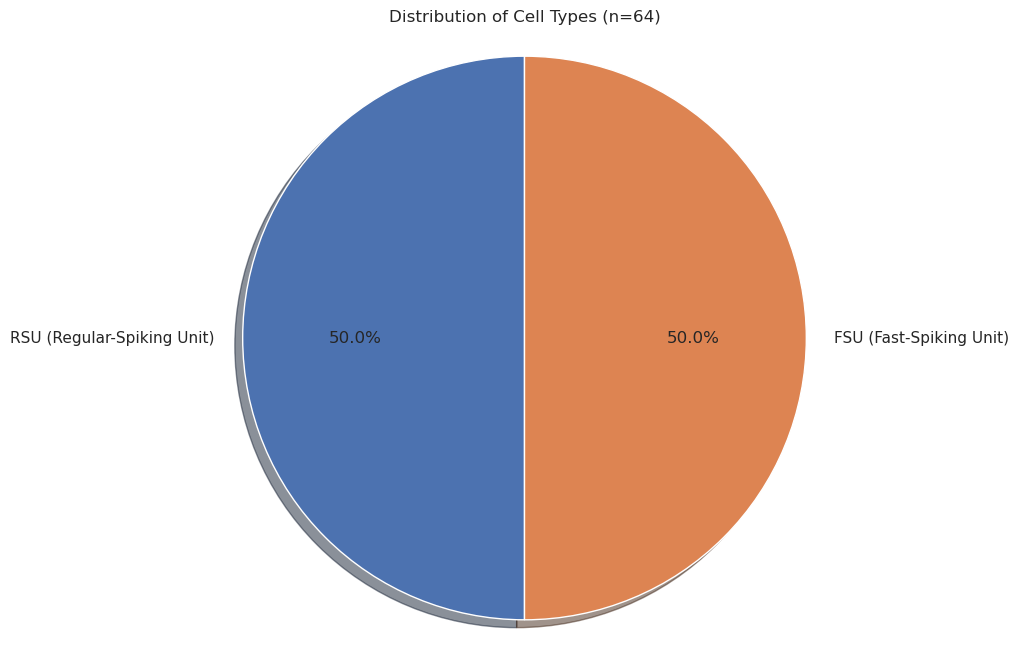

In [9]:
# Get units information
units = nwb.units
num_units = len(units)
print(f"Number of units: {num_units}")
print(f"Unit columns: {units.colnames}")

# Get cell type information
cell_types = units["celltype_label"].data[:]
unique_cell_types = np.unique(cell_types)
print(f"Unique cell types: {unique_cell_types}")

# Count units by cell type
cell_type_counts = {}
for cell_type in unique_cell_types:
    count = np.sum(cell_types == cell_type)
    if cell_type == 1:
        label = "RSU (Regular-Spiking Unit)"
    elif cell_type == 2:
        label = "FSU (Fast-Spiking Unit)"
    else:
        label = f"Type {cell_type}"
    cell_type_counts[label] = count
    print(f"{label}: {count} units")

# Create a pie chart of cell types
plt.figure(figsize=(8, 8))
plt.pie(cell_type_counts.values(), labels=cell_type_counts.keys(), autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title(f'Distribution of Cell Types (n={num_units})')
plt.show()

In this dataset, neurons are classified into two types:

1. RSU (Regular-Spiking Units) - These are typically excitatory pyramidal neurons
2. FSU (Fast-Spiking Units) - These are typically inhibitory interneurons

Let's look at the spike counts for each unit to get a sense of their activity levels.

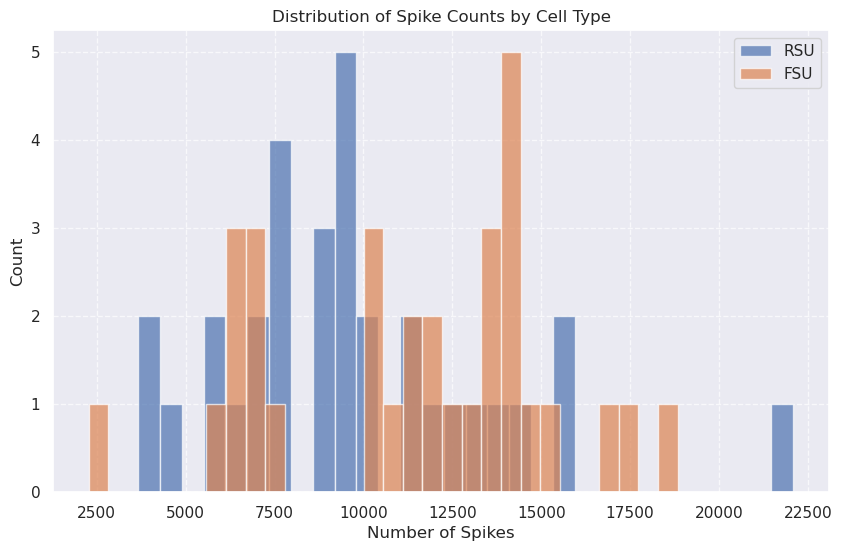

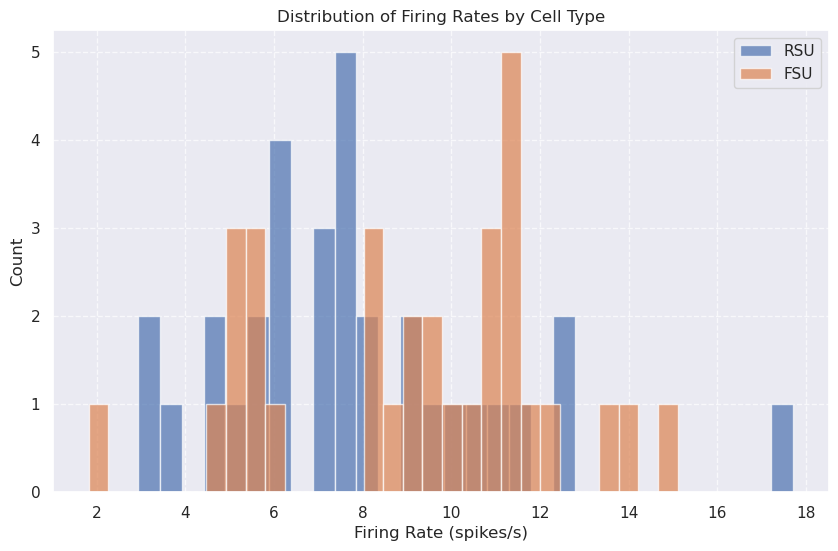

In [10]:
# Calculate spike counts for each unit
spike_counts = np.array([len(units["spike_times"][i]) for i in range(num_units)])

# Separate by cell type
rsu_indices = np.where(cell_types == 1)[0]
fsu_indices = np.where(cell_types == 2)[0]

rsu_spike_counts = spike_counts[rsu_indices]
fsu_spike_counts = spike_counts[fsu_indices]

# Plot histogram of spike counts by cell type
plt.figure(figsize=(10, 6))
plt.hist(rsu_spike_counts, bins=30, alpha=0.7, label='RSU')
plt.hist(fsu_spike_counts, bins=30, alpha=0.7, label='FSU')
plt.xlabel('Number of Spikes')
plt.ylabel('Count')
plt.title('Distribution of Spike Counts by Cell Type')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Calculate mean firing rates (spikes/s) over the entire recording
# Get first and last spike time to calculate approximate recording duration
first_spike = np.min([units["spike_times"][i][0] if len(units["spike_times"][i]) > 0 else np.inf for i in range(num_units)])
last_spike = np.max([units["spike_times"][i][-1] if len(units["spike_times"][i]) > 0 else -np.inf for i in range(num_units)])
recording_duration = last_spike - first_spike

# Calculate firing rates
firing_rates = spike_counts / recording_duration

# Separate by cell type
rsu_firing_rates = firing_rates[rsu_indices]
fsu_firing_rates = firing_rates[fsu_indices]

# Plot histogram of firing rates by cell type
plt.figure(figsize=(10, 6))
plt.hist(rsu_firing_rates, bins=30, alpha=0.7, label='RSU')
plt.hist(fsu_firing_rates, bins=30, alpha=0.7, label='FSU')
plt.xlabel('Firing Rate (spikes/s)')
plt.ylabel('Count')
plt.title('Distribution of Firing Rates by Cell Type')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## 4. Visualizing Neural Responses to Ultrasound Stimulation

Now, let's visualize how neurons respond to the ultrasound stimulation. We'll create raster plots and peri-stimulus time histograms (PSTHs) for example neurons.

### Raster Plot for an Example RSU

A raster plot shows spike times for multiple trials, with each row representing a trial and each vertical line representing a spike. This allows us to visualize patterns in neural activity around the time of stimulation.

In [11]:
# Function to create a raster plot for a given unit around trial onsets
def create_raster_plot(unit_index, window=(-0.5, 1.0), num_trials=50, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    
    spike_times = units["spike_times"][unit_index]
    cell_type = "RSU" if cell_types[unit_index] == 1 else "FSU"
    
    # Limit to first num_trials trials for clarity
    trial_starts = trial_start_times[:num_trials]
    
    # For each trial, plot the spikes that occur within the window around trial onset
    for i, trial_start in enumerate(trial_starts):
        # Find spikes within the window of this trial
        trial_window_start = trial_start + window[0]
        trial_window_end = trial_start + window[1]
        trial_spikes = spike_times[(spike_times >= trial_window_start) & 
                                 (spike_times <= trial_window_end)]
        
        # Plot each spike as a vertical line at the corresponding time, shifted by trial_start
        if len(trial_spikes) > 0:
            ax.vlines(trial_spikes - trial_start, i + 0.5, i + 1.5, color='black', linewidth=0.5)
    
    # Add a vertical line at t=0 (trial onset)
    ax.axvline(x=0, color='red', linestyle='--', label='Trial Onset')
    
    # Add a vertical line at the mean trial duration
    mean_duration = 0.067  # 67ms ultrasound duration
    ax.axvline(x=mean_duration, color='blue', linestyle='--', label='Stimulation End (67ms)')
    
    # Set labels and title
    ax.set_xlabel('Time relative to trial onset (s)')
    ax.set_ylabel('Trial Number')
    ax.set_title(f'Raster Plot for Unit {unit_index} ({cell_type})')
    ax.set_xlim(window)
    ax.set_ylim(0.5, len(trial_starts) + 0.5)
    ax.legend()
    
    return ax

# Function to create a PSTH (Peri-Stimulus Time Histogram) for a given unit
def create_psth(unit_index, window=(-0.5, 1.0), bin_width=0.05, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    
    spike_times = units["spike_times"][unit_index]
    cell_type = "RSU" if cell_types[unit_index] == 1 else "FSU"
    
    # Create bins for the histogram
    bins = np.arange(window[0], window[1] + bin_width, bin_width)
    bin_centers = bins[:-1] + bin_width/2
    
    # Create histogram data
    hist_data = np.zeros(len(bin_centers))
    
    # For each trial, count spikes in each bin
    for trial_start in trial_start_times:
        # Find spikes within the window of this trial
        trial_window_start = trial_start + window[0]
        trial_window_end = trial_start + window[1]
        trial_spikes = spike_times[(spike_times >= trial_window_start) & 
                                 (spike_times <= trial_window_end)]
        
        # Convert spike times to times relative to trial start
        relative_spike_times = trial_spikes - trial_start
        
        # Count spikes in each bin
        hist, _ = np.histogram(relative_spike_times, bins=bins)
        hist_data += hist
    
    # Convert to firing rate (spikes/s)
    firing_rate = hist_data / (len(trial_start_times) * bin_width)
    
    # Plot the histogram
    ax.bar(bin_centers, firing_rate, width=bin_width, alpha=0.7, color='blue')
    
    # Add a vertical line at t=0 (trial onset)
    ax.axvline(x=0, color='red', linestyle='--', label='Trial Onset')
    
    # Add a vertical line at the mean trial duration
    mean_duration = 0.067  # 67ms ultrasound duration
    ax.axvline(x=mean_duration, color='green', linestyle='--', label='Stimulation End (67ms)')
    
    # Set labels and title
    ax.set_xlabel('Time relative to trial onset (s)')
    ax.set_ylabel('Firing Rate (spikes/s)')
    ax.set_title(f'PSTH for Unit {unit_index} ({cell_type})')
    ax.set_xlim(window)
    ax.legend()
    
    return ax

Let's select some example units for visualization. We'll choose units with a good number of spikes.

In [12]:
# Find the units with the most spikes (separately for RSU and FSU)
rsu_spike_counts = [(i, len(units["spike_times"][i])) for i in range(num_units) if cell_types[i] == 1]
fsu_spike_counts = [(i, len(units["spike_times"][i])) for i in range(num_units) if cell_types[i] == 2]

# Sort by spike count (descending)
rsu_spike_counts.sort(key=lambda x: x[1], reverse=True)
fsu_spike_counts.sort(key=lambda x: x[1], reverse=True)

# Pick the top units from each type
example_rsu = rsu_spike_counts[0][0] if rsu_spike_counts else None
example_fsu = fsu_spike_counts[0][0] if fsu_spike_counts else None

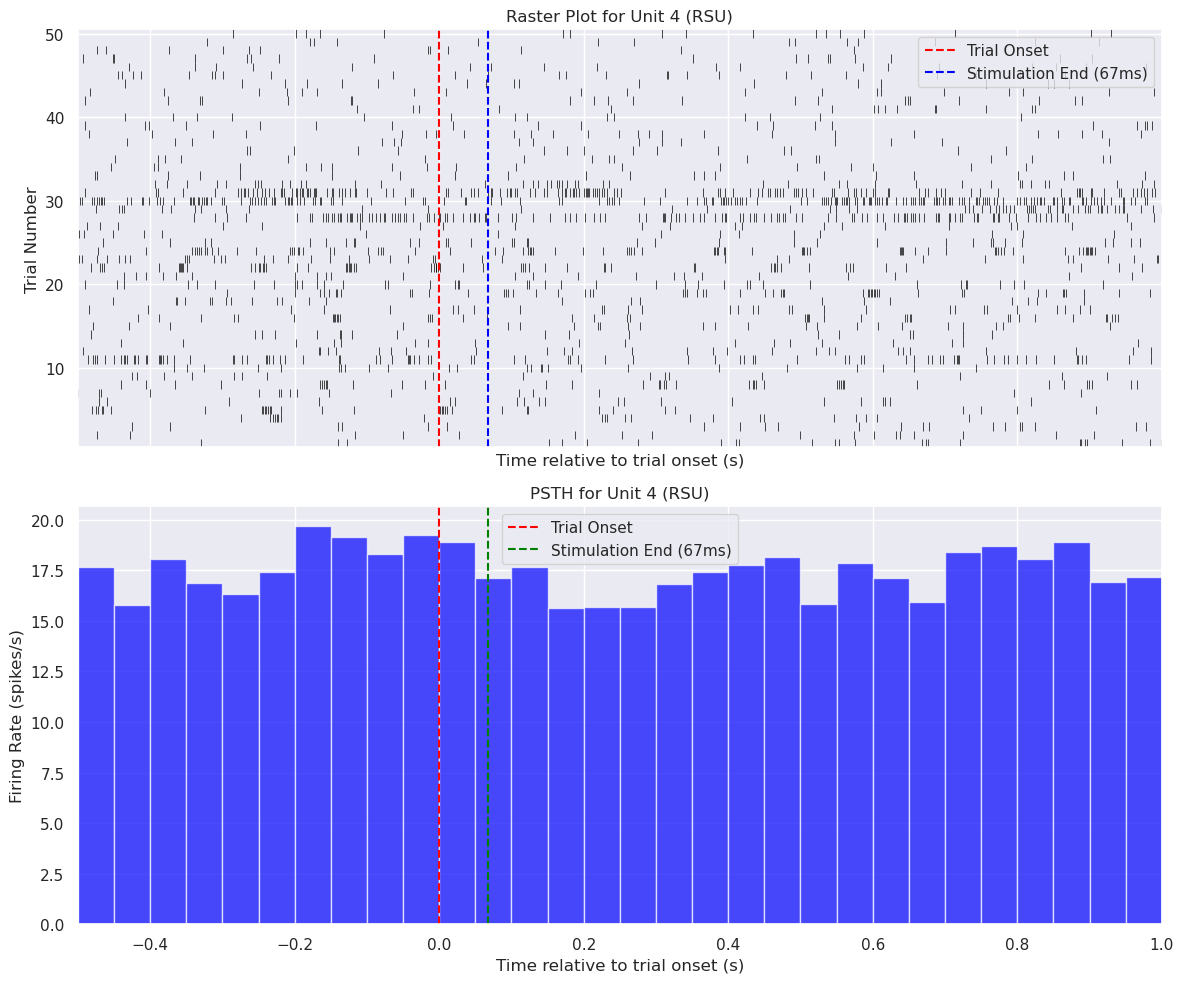

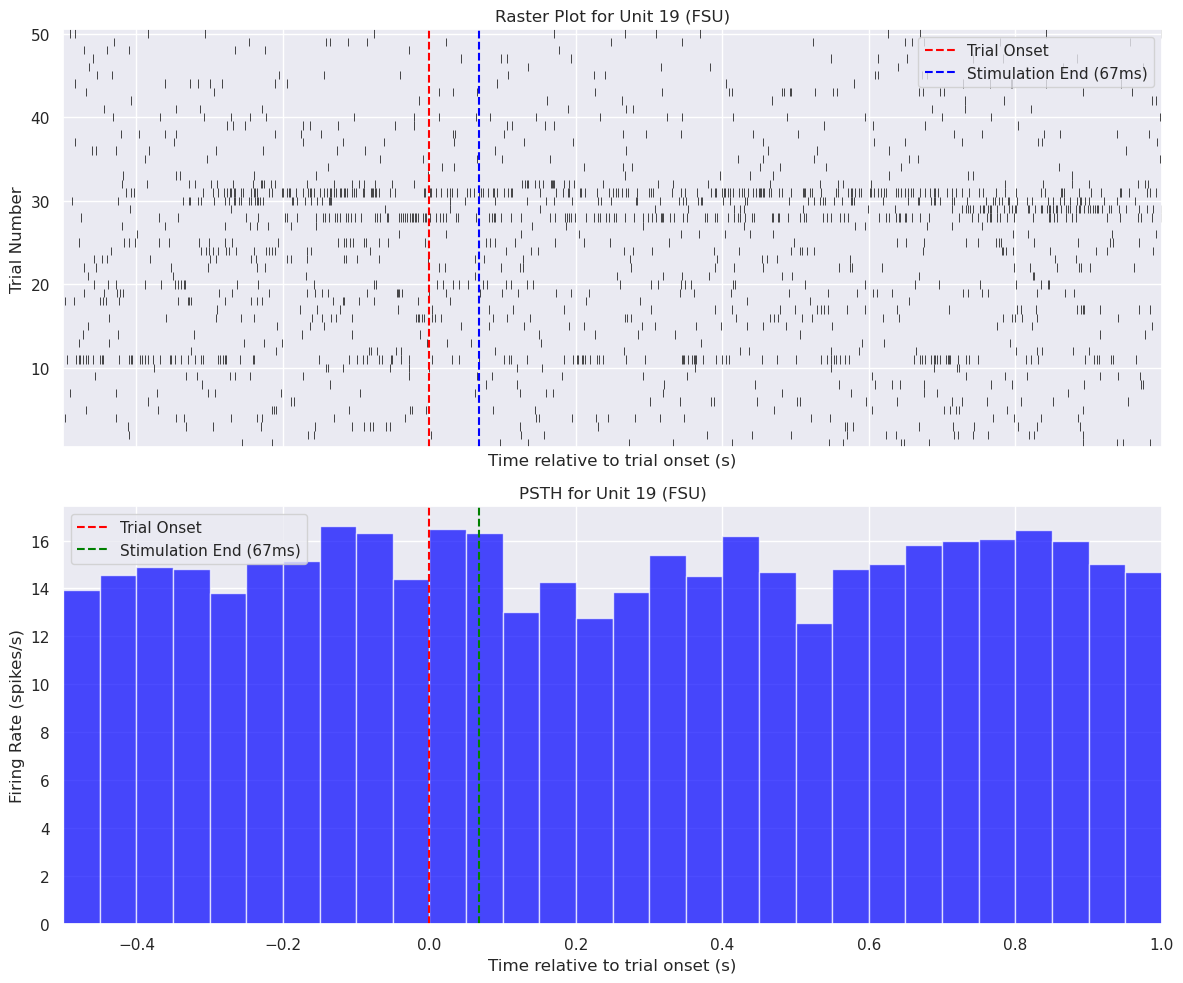

In [13]:
# Create raster plot and PSTH for example RSU (if we found one)
if example_rsu is not None:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
    create_raster_plot(example_rsu, ax=ax1)
    create_psth(example_rsu, ax=ax2)
    plt.tight_layout()
    plt.show()

# Create raster plot and PSTH for example FSU (if we found one)
if example_fsu is not None:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
    create_raster_plot(example_fsu, ax=ax1)
    create_psth(example_fsu, ax=ax2)
    plt.tight_layout()
    plt.show()

### Comparing Average Responses by Cell Type

Now, let's compare the average response patterns of RSU and FSU neurons to the ultrasound stimulation.

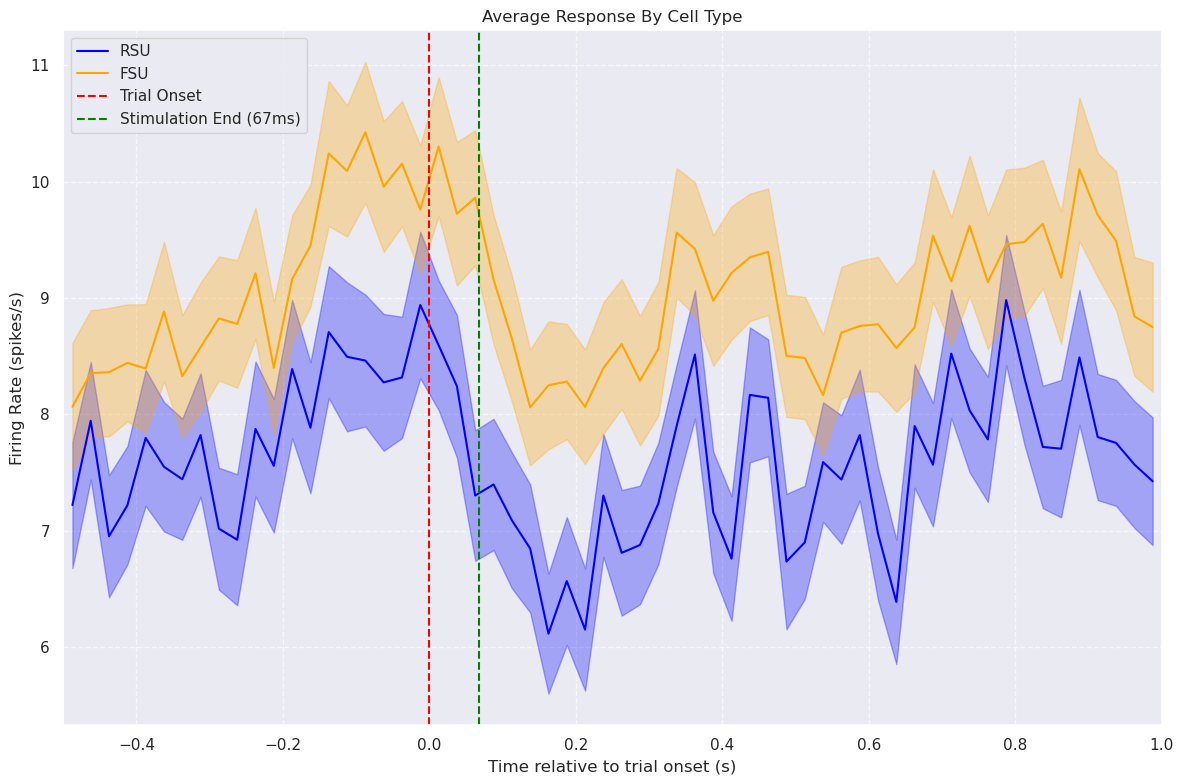

In [14]:
# Calculate trial-averaged responses for all units by cell type
window = (-0.5, 1.0)
bin_width = 0.025
bins = np.arange(window[0], window[1] + bin_width, bin_width)
bin_centers = bins[:-1] + bin_width/2
num_bins = len(bin_centers)

# Arrays to store average responses
rsu_responses = np.zeros((len(rsu_indices), num_bins))
fsu_responses = np.zeros((len(fsu_indices), num_bins))

# Calculate trial-averaged response for each RSU
for i, unit_index in enumerate(rsu_indices):
    spike_times = units["spike_times"][unit_index]
    
    # Calculate histogram for this unit
    hist_data = np.zeros(num_bins)
    
    for trial_start in trial_start_times:
        # Find spikes within the window of this trial
        trial_window_start = trial_start + window[0]
        trial_window_end = trial_start + window[1]
        trial_spikes = spike_times[(spike_times >= trial_window_start) & 
                                 (spike_times <= trial_window_end)]
        
        # Convert spike times to times relative to trial start
        relative_spike_times = trial_spikes - trial_start
        
        # Count spikes in each bin
        hist, _ = np.histogram(relative_spike_times, bins=bins)
        hist_data += hist
    
    # Convert to firing rate (spikes/s)
    rsu_responses[i] = hist_data / (len(trial_start_times) * bin_width)

# Calculate trial-averaged response for each FSU
for i, unit_index in enumerate(fsu_indices):
    spike_times = units["spike_times"][unit_index]
    
    # Calculate histogram for this unit
    hist_data = np.zeros(num_bins)
    
    for trial_start in trial_start_times:
        # Find spikes within the window of this trial
        trial_window_start = trial_start + window[0]
        trial_window_end = trial_start + window[1]
        trial_spikes = spike_times[(spike_times >= trial_window_start) & 
                                 (spike_times <= trial_window_end)]
        
        # Convert spike times to times relative to trial start
        relative_spike_times = trial_spikes - trial_start
        
        # Count spikes in each bin
        hist, _ = np.histogram(relative_spike_times, bins=bins)
        hist_data += hist
    
    # Convert to firing rate (spikes/s)
    fsu_responses[i] = hist_data / (len(trial_start_times) * bin_width)

# Calculate the mean and SEM across units
mean_rsu_response = np.mean(rsu_responses, axis=0)
sem_rsu_response = np.std(rsu_responses, axis=0) / np.sqrt(len(rsu_indices))

mean_fsu_response = np.mean(fsu_responses, axis=0)
sem_fsu_response = np.std(fsu_responses, axis=0) / np.sqrt(len(fsu_indices))

# Plot the average responses
plt.figure(figsize=(12, 8))

plt.plot(bin_centers, mean_rsu_response, color='blue', label='RSU')
plt.fill_between(bin_centers, 
                 mean_rsu_response - sem_rsu_response,
                 mean_rsu_response + sem_rsu_response,
                 color='blue', alpha=0.3)

plt.plot(bin_centers, mean_fsu_response, color='orange', label='FSU')
plt.fill_between(bin_centers, 
                 mean_fsu_response - sem_fsu_response,
                 mean_fsu_response + sem_fsu_response,
                 color='orange', alpha=0.3)

# Add a vertical line at t=0 (trial onset)
plt.axvline(x=0, color='red', linestyle='--', label='Trial Onset')

# Add a vertical line at the end of stimulation
plt.axvline(x=0.067, color='green', linestyle='--', label='Stimulation End (67ms)')

plt.xlabel('Time relative to trial onset (s)')
plt.ylabel('Firing Rate (spikes/s)')
plt.title('Average Response By Cell Type')
plt.legend()
plt.xlim(window)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Calculating Average Firing Rates Before, During, and After Stimulation

Let's calculate average firing rates before, during, and after stimulation to quantify the response to ultrasound.

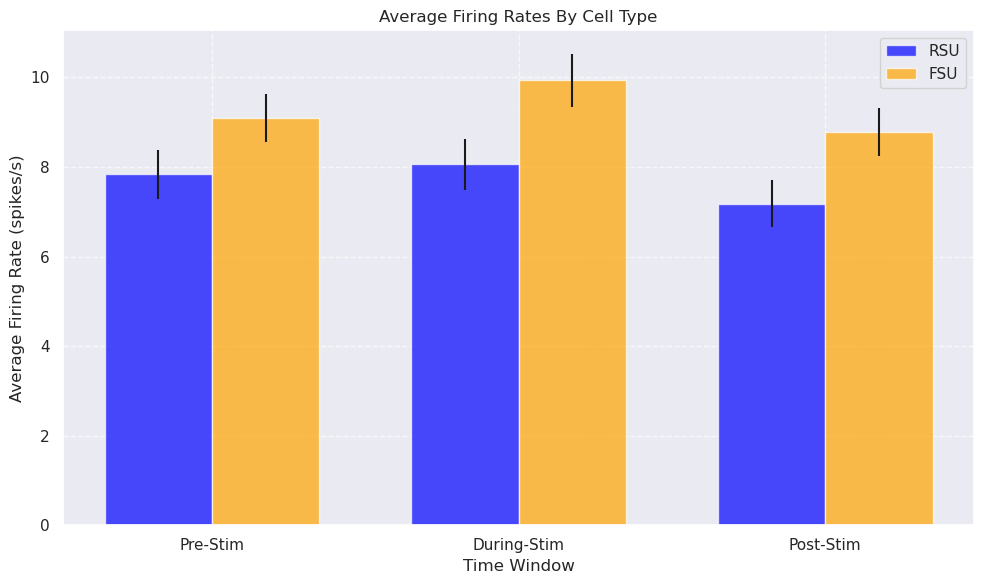

In [15]:
# Define time windows relative to trial onset (in seconds)
pre_stim = (-0.5, 0)  # 0.5s before stimulation
during_stim = (0, 0.067)  # During stimulation (67ms)
post_stim = (0.067, 0.5)  # 0.5s after stimulation

# Arrays to store firing rates for each unit
rsu_rates = np.zeros((len(rsu_indices), 3))  # [pre, during, post]
fsu_rates = np.zeros((len(fsu_indices), 3))  # [pre, during, post]

# Calculate firing rates for RSUs
for i, unit_index in enumerate(rsu_indices):
    spike_times = units["spike_times"][unit_index]
    
    # Calculate firing rates for each time window
    pre_rate = 0
    during_rate = 0
    post_rate = 0
    
    for trial_start in trial_start_times:
        # Pre-stimulation window
        window_start = trial_start + pre_stim[0]
        window_end = trial_start + pre_stim[1]
        spikes_in_window = np.sum((spike_times >= window_start) & (spike_times < window_end))
        pre_rate += spikes_in_window / (pre_stim[1] - pre_stim[0])
        
        # During stimulation window
        window_start = trial_start + during_stim[0]
        window_end = trial_start + during_stim[1]
        spikes_in_window = np.sum((spike_times >= window_start) & (spike_times < window_end))
        during_rate += spikes_in_window / (during_stim[1] - during_stim[0])
        
        # Post-stimulation window
        window_start = trial_start + post_stim[0]
        window_end = trial_start + post_stim[1]
        spikes_in_window = np.sum((spike_times >= window_start) & (spike_times < window_end))
        post_rate += spikes_in_window / (post_stim[1] - post_stim[0])
    
    # Average over all trials
    n_trials = len(trial_start_times)
    rsu_rates[i, 0] = pre_rate / n_trials
    rsu_rates[i, 1] = during_rate / n_trials
    rsu_rates[i, 2] = post_rate / n_trials

# Calculate firing rates for FSUs
for i, unit_index in enumerate(fsu_indices):
    spike_times = units["spike_times"][unit_index]
    
    # Calculate firing rates for each time window
    pre_rate = 0
    during_rate = 0
    post_rate = 0
    
    for trial_start in trial_start_times:
        # Pre-stimulation window
        window_start = trial_start + pre_stim[0]
        window_end = trial_start + pre_stim[1]
        spikes_in_window = np.sum((spike_times >= window_start) & (spike_times < window_end))
        pre_rate += spikes_in_window / (pre_stim[1] - pre_stim[0])
        
        # During stimulation window
        window_start = trial_start + during_stim[0]
        window_end = trial_start + during_stim[1]
        spikes_in_window = np.sum((spike_times >= window_start) & (spike_times < window_end))
        during_rate += spikes_in_window / (during_stim[1] - during_stim[0])
        
        # Post-stimulation window
        window_start = trial_start + post_stim[0]
        window_end = trial_start + post_stim[1]
        spikes_in_window = np.sum((spike_times >= window_start) & (spike_times < window_end))
        post_rate += spikes_in_window / (post_stim[1] - post_stim[0])
    
    # Average over all trials
    n_trials = len(trial_start_times)
    fsu_rates[i, 0] = pre_rate / n_trials
    fsu_rates[i, 1] = during_rate / n_trials
    fsu_rates[i, 2] = post_rate / n_trials

# Calculate averages across units
avg_rsu_rates = np.mean(rsu_rates, axis=0)
avg_fsu_rates = np.mean(fsu_rates, axis=0)

# Calculate standard error of the mean
sem_rsu_rates = np.std(rsu_rates, axis=0) / np.sqrt(len(rsu_indices))
sem_fsu_rates = np.std(fsu_rates, axis=0) / np.sqrt(len(fsu_indices))

# Plot
plt.figure(figsize=(10, 6))
x = np.arange(3)
width = 0.35

plt.bar(x - width/2, avg_rsu_rates, width, yerr=sem_rsu_rates, label='RSU', color='blue', alpha=0.7)
plt.bar(x + width/2, avg_fsu_rates, width, yerr=sem_fsu_rates, label='FSU', color='orange', alpha=0.7)

plt.xlabel('Time Window')
plt.ylabel('Average Firing Rate (spikes/s)')
plt.title('Average Firing Rates By Cell Type')
plt.xticks(x, ['Pre-Stim', 'During-Stim', 'Post-Stim'])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 5. Exploring Other NWB Files with Different PRF Values

Now let's examine how different pulse repetition frequencies (PRF) affect neural responses. We'll select NWB files with different PRF values and compare the responses.

Note: The following code demonstrates how you could analyze files with different PRF values. For a complete analysis, you would need to load and process multiple files, which can be time-consuming due to the remote data access. Here, we show the approach using our current file as an example.

### Extracting PRF from the NWB Identifier

The PRF value is typically encoded in the NWB identifier. For example, if the identifier is "BH498_3000_200", the PRF is 3000 Hz.

In [16]:
# Extract PRF from the NWB identifier
def extract_prf(identifier):
    import re
    match = re.search(r'_(\d+)_', identifier)
    if match:
        try:
            prf = int(match.group(1))
            # Verify it's one of the expected PRF values
            if prf in [30, 300, 1500, 3000, 4500]:
                return prf
        except ValueError:
            pass
    return None

current_prf = extract_prf(nwb.identifier)
print(f"Current file PRF: {current_prf} Hz")

Current file PRF: 4500 Hz


### Example Analysis Across Different PRF Values

To properly compare responses across different PRF values, you would need to:

1. Identify files with different PRF values for the same subject
2. Load each file and calculate neural responses
3. Compare responses across different PRF values

Below is a description of the expected patterns based on research with this dataset:

- Higher PRF values (3000-4500 Hz) tend to produce stronger neural responses
- Different cell types (RSU vs FSU) show distinct patterns of modulation by PRF
- FSU neurons tend to show greater sensitivity to PRF variation
- The temporal pattern of the response (e.g., delay, duration) can also vary with PRF

## 6. Further Analysis Ideas

Here are some additional analyses you might consider for exploring this dataset:

1. **Comparing responses across different subjects**: The dataset includes recordings from 10 rat subjects, allowing you to examine individual differences in neural responses.

2. **Comparing awake vs. anesthetized responses**: Some recordings were performed under anesthesia, which allows comparison of ultrasound responses in different brain states.

3. **Examining spatial patterns**: The 32-channel electrode array provides spatial information about the recorded neurons, which could reveal spatial patterns in the ultrasound response.

4. **Population analysis**: Analyzing correlations between neurons or using dimensionality reduction techniques (e.g., PCA) could reveal population-level patterns in the neural response.

5. **Response latency analysis**: Measuring the time delay between stimulation onset and neural response could provide insights into the mechanisms of ultrasound neuromodulation.

6. **Changes over trials**: Analyzing how responses change over the course of many trials could reveal adaptation or plasticity effects.

## Conclusion

In this notebook, we've explored the neural spiking data in Dandiset 000945, which contains recordings of rat somatosensory cortex responses to transcranial focused ultrasound stimulation. We've examined:

- The dataset structure and metadata
- Properties of the recorded neurons (RSU vs. FSU cell types)
- Neural responses to ultrasound stimulation
- Examples of how to analyze trial-related spiking activity
- Differences in response patterns between cell types

This dataset provides a valuable resource for studying how ultrasound stimulation affects neural activity. The various stimulation parameters (especially different PRF values) allow investigation of how the characteristics of ultrasound stimulation modulate neural responses. This could have important implications for the development of ultrasound-based neuromodulation techniques.

Remember that this notebook is meant as a starting point for your own analyses. The actual patterns in the data might vary depending on the specific files you examine, and more sophisticated analyses might reveal additional insights.